## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [3]:
print(f"Mean:\n{df.mean()}\nVariance:\n{df.var()}")

Mean:
AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64
Variance:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

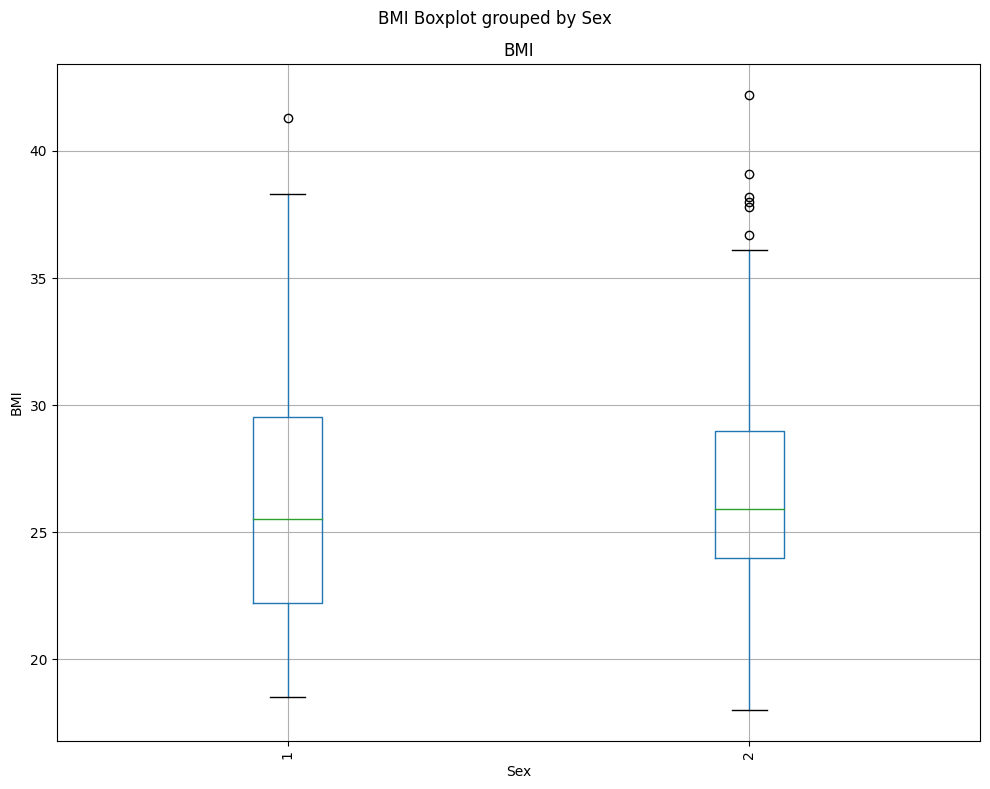

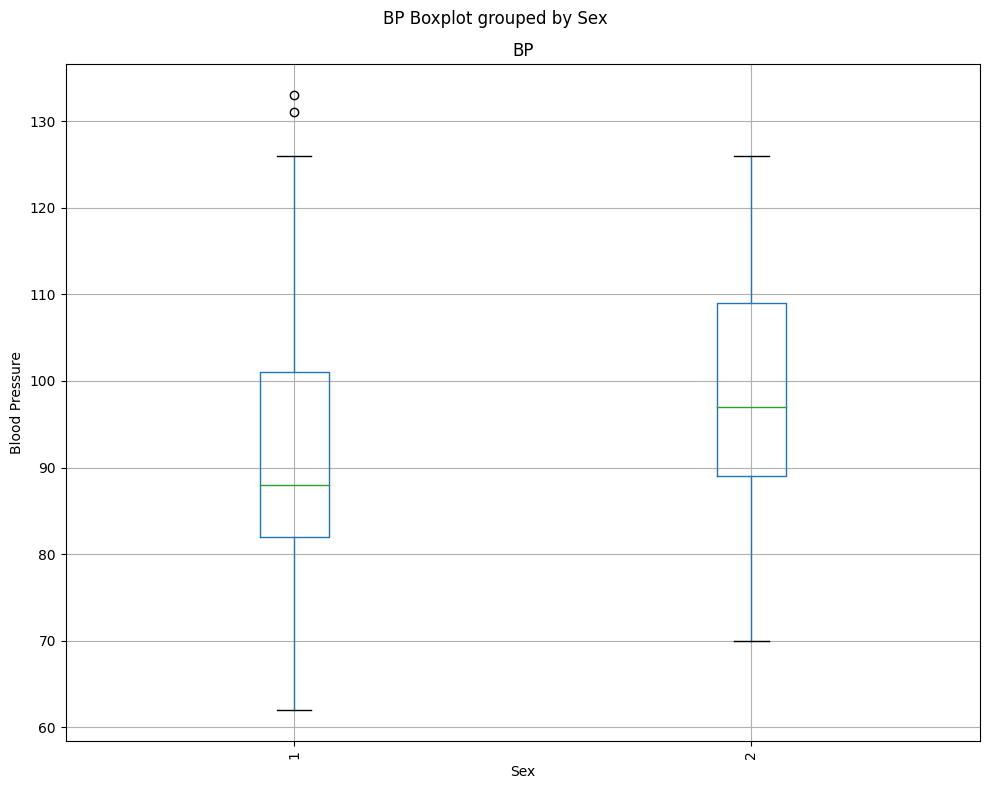

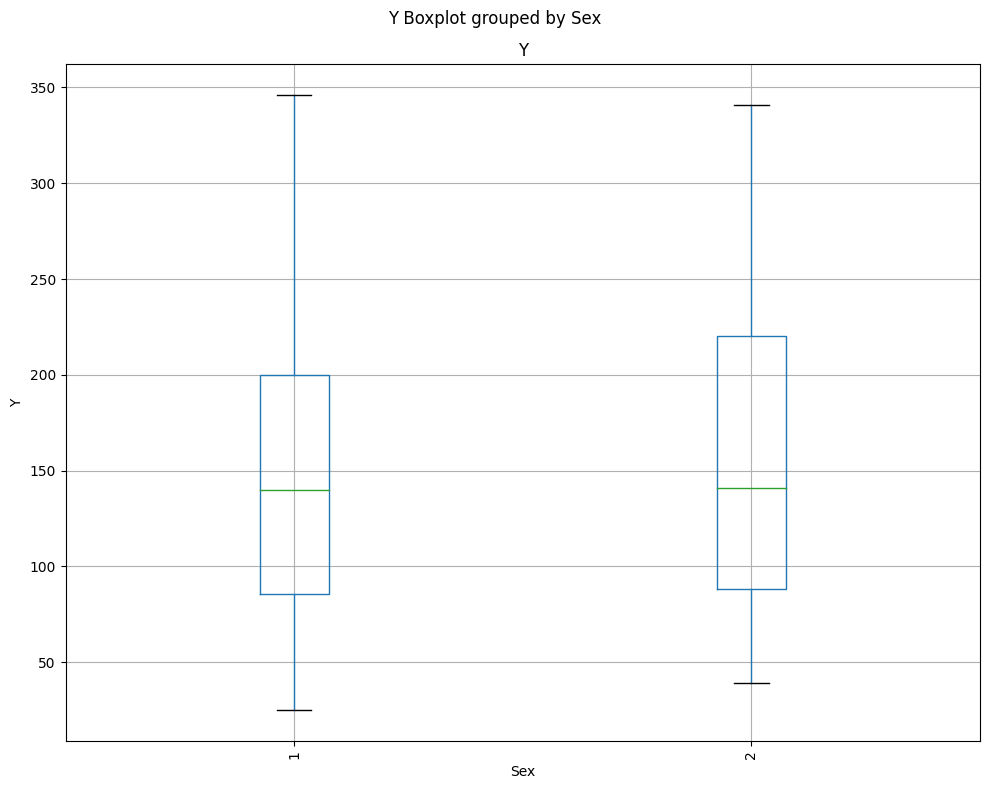

In [4]:
#boxplot for BMI
df.boxplot(column='BMI', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.suptitle('BMI Boxplot grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()
#boxplot for BP
df.boxplot(column='BP', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.suptitle('BP Boxplot grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure')
plt.tight_layout()
plt.show()
#boxplot for Y
df.boxplot(column='Y', by='SEX', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.suptitle('Y Boxplot grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

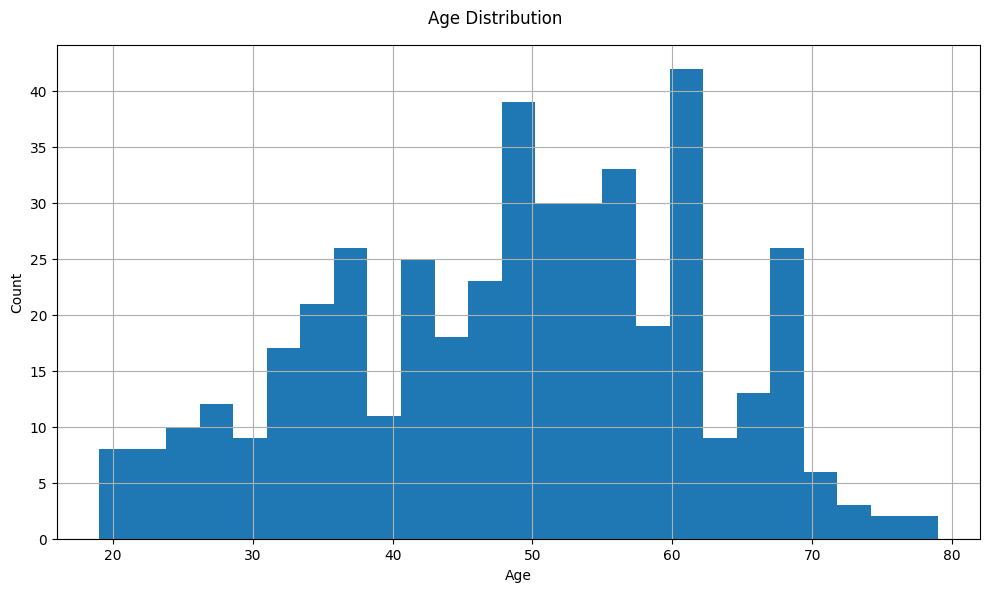

Conclusion: Age is somewhat normally distributed


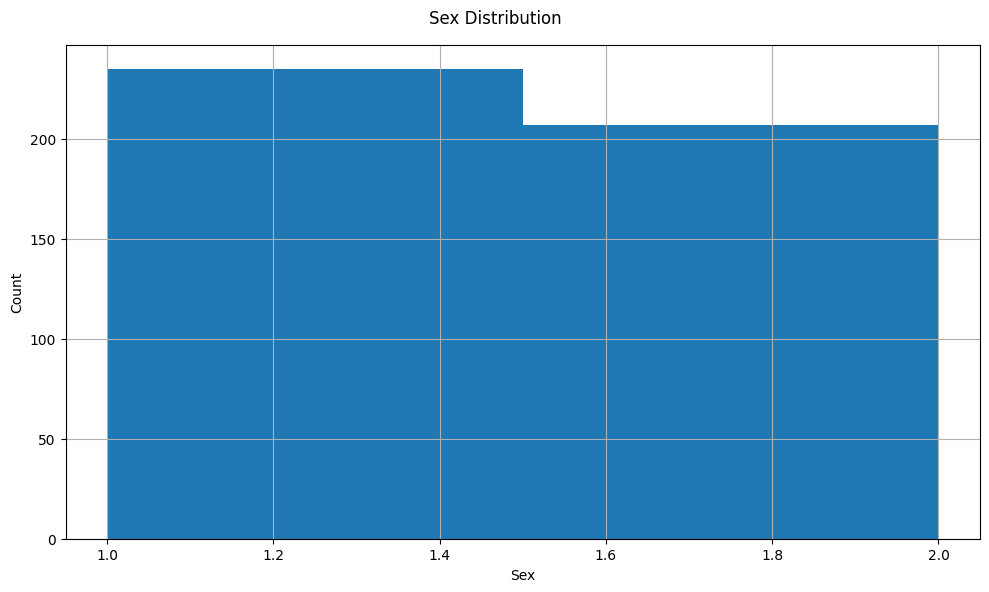

Conclusion: Sex is uniformly distributed


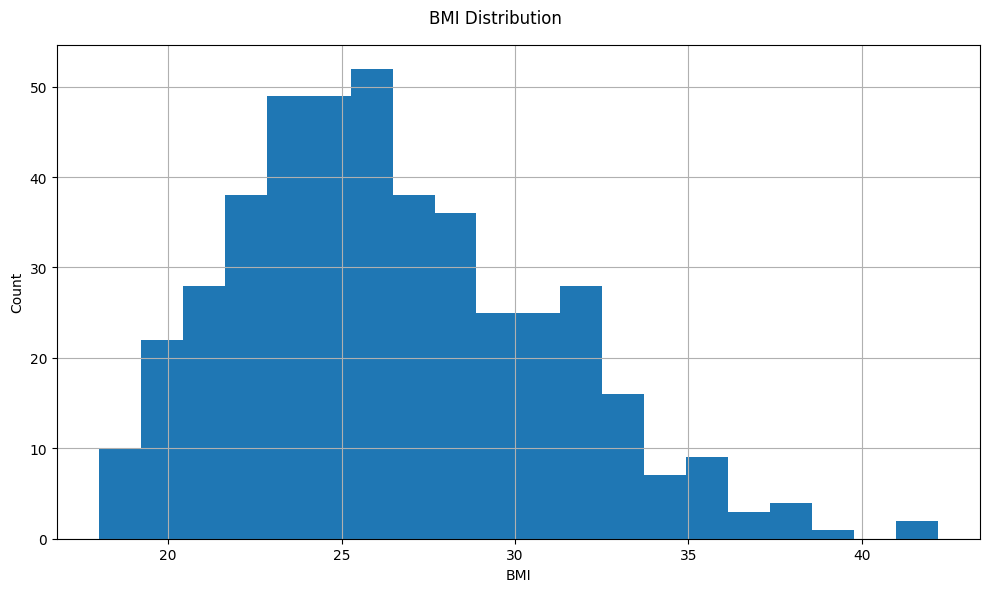

Conclusion: BMI is normally distributed


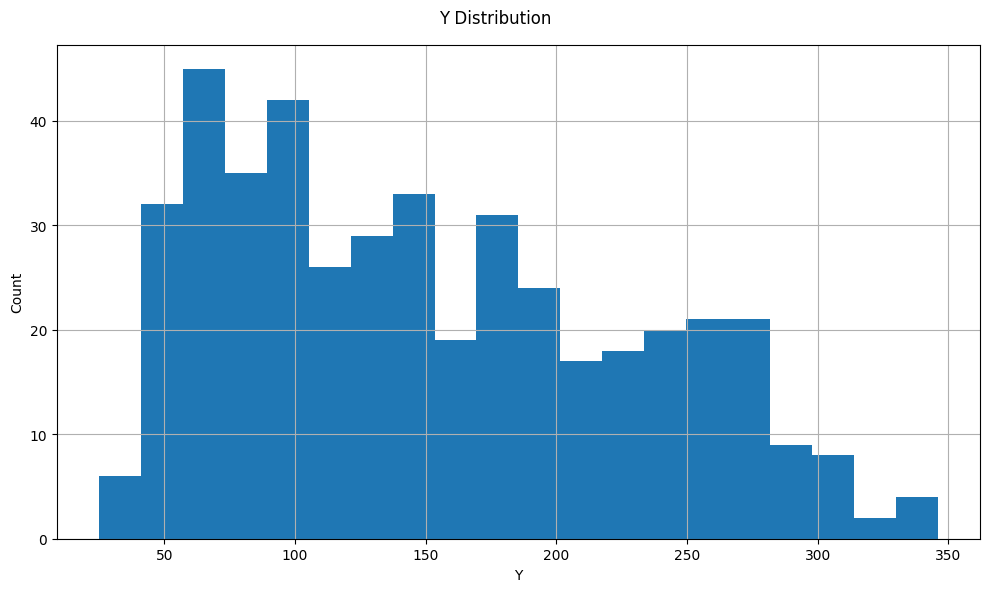

Conclusion: Y is *normally* distributed


In [5]:
#Age Distribution
df['AGE'].hist(bins=25, figsize=(10,6))
plt.suptitle('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Conclusion: Age is somewhat normally distributed")
#Sex Distribution
df['SEX'].hist(bins=2, figsize=(10,6))
plt.suptitle('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Conclusion: Sex is uniformly distributed")
#BMI Distribution
df['BMI'].hist(bins=20, figsize=(10,6))
plt.suptitle('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Conclusion: BMI is normally distributed")
#Y Distribution
df['Y'].hist(bins=20, figsize=(10,6))
plt.suptitle('Y Distribution')
plt.xlabel('Y')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print("Conclusion: Y is *normally* distributed")

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [6]:
print(f"Age and Y correlation = {np.corrcoef(df['AGE'],df['Y'])[0,1]}")
print(f"Sex and Y correlation = {np.corrcoef(df['SEX'],df['Y'])[0,1]}")
print(f"BMI and Y correlation = {np.corrcoef(df['BMI'],df['Y'])[0,1]}")
print(f"BP and Y correlation = {np.corrcoef(df['BP'],df['Y'])[0,1]}")
print(f"S1 and Y correlation = {np.corrcoef(df['S1'],df['Y'])[0,1]}")
print(f"S2 and Y correlation = {np.corrcoef(df['S2'],df['Y'])[0,1]}")
print(f"S3 and Y correlation = {np.corrcoef(df['S3'],df['Y'])[0,1]}")
print(f"S4 and Y correlation = {np.corrcoef(df['S4'],df['Y'])[0,1]}")
print(f"S5 and Y correlation = {np.corrcoef(df['S5'],df['Y'])[0,1]}")
print(f"S6 and Y correlation = {np.corrcoef(df['S6'],df['Y'])[0,1]}")

Age and Y correlation = 0.18788875071891978
Sex and Y correlation = 0.043061998451605334
BMI and Y correlation = 0.5864501344746885
BP and Y correlation = 0.4414817585625713
S1 and Y correlation = 0.2120224810145507
S2 and Y correlation = 0.17405358696874262
S3 and Y correlation = -0.3947892506709184
S4 and Y correlation = 0.43045288474477267
S5 and Y correlation = 0.5658825924427439
S6 and Y correlation = 0.3824834842485811


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [8]:
import scipy.stats
from scipy.stats import ttest_ind as tti

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h
#Check across confidence intervals:
print("Confidence Interval test")
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['SEX']==1,['Y']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['SEX']==2,['Y']],p)
    print(f'Conf={p:.2f}, Sex 1: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, Sex 2: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')
print("In all confidence intervals, the Y-values overlap across sexes.")
#Student t-test:
print("Student t-test method:")
tval, pval = tti(df.loc[df['SEX']==1,['Y']],df.loc[df['SEX']==2,['Y']], equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value = {pval[0]}")
print("The p-value indicates that there is some probability that these two distributions have the same mean.\n As such, it can be concluded from both tests that the hypothesis is somewhat falsified.")


Confidence Interval test
Conf=0.85, Sex 1: 141.87..156.17, Sex 2: 147.79..163.55
Conf=0.90, Sex 1: 140.84..157.20, Sex 2: 146.66..164.68
Conf=0.95, Sex 1: 139.27..158.78, Sex 2: 144.92..166.42
In all confidence intervals, the Y-values overlap across sexes.
Student t-test method:
T-value = -0.90
P-value = 0.3674449793083975
The p-value indicates that there is some probability that these two distributions have the same mean.
 As such, it can be concluded from both tests that the hypothesis is somewhat falsified.
